# Project Team ID : PTID-CDS-DEC-23-1718
# Project Code : PRCP-1024-Texas salary pred
# Project Name : Texas employee salary prediction

# Problem Statement

- Create a predictive model which will help theTexas state government
team to know the payroll information of employees of the state of Texas.
- 
 Who are the outliers in the salaries?
 What departments/roles have the biggest wage disparities between
managers and employees?
 Have salaries and total compensations for some roles/ departments/
head-count changed over time?

# Importing necesary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Load data

In [2]:
df = pd.read_csv('salary.csv')

# Basic checks

In [3]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [4]:
df.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [6]:
#renaming the column name for standardisation
df= df.rename(columns={'AGENCY NAME':'AGENCY_NAME','CLASS CODE' :'CLASS_CODE','CLASS TITLE':'CLASS_TITLE' , 'EMPLOY DATE':'EMPLOY_DATE', 'HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK'})
df.head(0)

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search


In [7]:
df.describe(include='all')

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
count,149481.000000,149481,149481,149481,149481,149481,149481,149481,149481,149481,...,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,143,14.0,97,16.000000,16
unique,NaN,113,38675,23559,27,1481,1422,6,2,11,...,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1
top,NaN,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True
freq,NaN,36667,1243,1843,38408,9267,9267,67142,85328,142502,...,NaN,NaN,NaN,NaN,NaN,143,NaN,97,NaN,16
mean,545.736288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,NaN,1.0,NaN,74303.955000,NaN
std,139.057691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,NaN,0.0,NaN,51925.944282,NaN
min,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,50.000000,600.000000,1.000000e+00,NaN,1.0,NaN,18000.000000,NaN
25%,529.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,NaN,1.0,NaN,32962.500000,NaN
50%,530.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,NaN,1.0,NaN,48063.300000,NaN
75%,696.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,NaN,1.0,NaN,123751.770000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY_NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS_CODE               149481 non-null  object 
 6   CLASS_TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY_DATE              149481 non-null  object 
 11  HRLY_RATE                149481 non-null  float64
 12  HRS_PER_WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

# Data preprocessing

In [9]:
df.isnull().sum()

AGENCY                          0
AGENCY_NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS_CODE                      0
CLASS_TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY_DATE                     0
HRLY_RATE                       0
HRS_PER_WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [10]:
df.skew()

AGENCY                     -0.604874
HRLY_RATE                  15.918099
HRS_PER_WK                 -8.379278
MONTHLY                     2.702805
ANNUAL                      2.702805
STATE NUMBER                0.247161
duplicated                  0.000000
multiple_full_time_jobs     0.000000
combined_multiple_jobs      0.000000
summed_annual_salary        0.603340
hide_from_search            0.000000
dtype: float64

##### skewness is quite high for  HRLY_RATE, HRS_PER_WK, and not normal for MONTHLY  and ANNUAL columns

In [11]:
df.describe()

,AGENCY,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [12]:
continous=['HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'summed_annual_salary']

In [13]:
c = df[['HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'summed_annual_salary']].corr()
c

,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,summed_annual_salary
HRLY_RATE,1.000000,-0.337784,0.086291,0.086291,0.392481
HRS_PER_WK,-0.337784,1.000000,0.096041,0.096041,0.529473
MONTHLY,0.086291,0.096041,1.000000,1.000000,0.977757
ANNUAL,0.086291,0.096041,1.000000,1.000000,0.977757
summed_annual_salary,0.392481,0.529473,0.977757,0.977757,1.000000


#### Correlation between  Montly and Annual is 1, while that between summed_annual_salary and monthly and annual is 0.97, so we can drop some of these columns, 

In [14]:
df.drop(columns=['ANNUAL', 'summed_annual_salary'], inplace=True)
df

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717,True,NaN,NaN,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717,True,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,59115,True,NaN,NaN,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,59115,True,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,165030,True,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490,NaN,NaN,NaN,NaN


# Feature selection

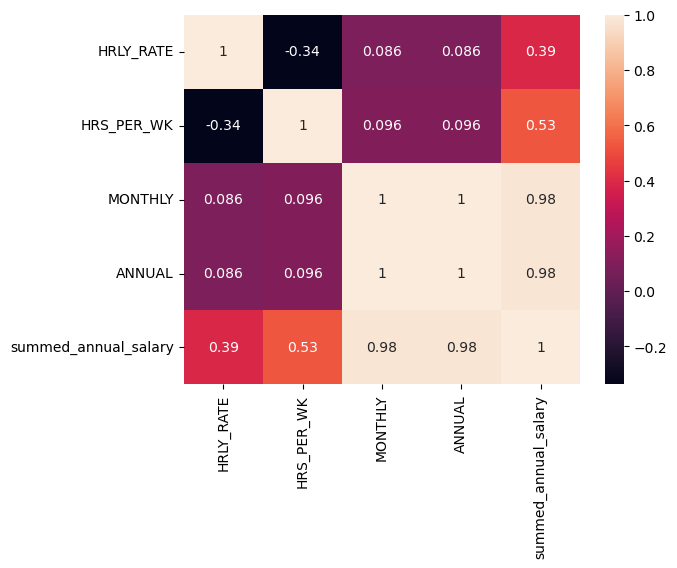

In [15]:
sns.heatmap(c, annot=True)
plt.show()

In [16]:
df.drop(columns=['duplicated',  'multiple_full_time_jobs', 'combined_multiple_jobs', 'hide_from_search'], inplace=True)
df

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490


# Outliers

In [17]:
df['MONTHLY'].describe()

count    149481.000000
mean       4226.184248
std        2093.111691
min          50.000000
25%        3019.840000
50%        3720.170000
75%        4865.810000
max       46125.000000
Name: MONTHLY, dtype: float64

In [18]:
Outlier_in_salaries = df[(df['MONTHLY']>4865) | (df['MONTHLY']<3019)]['CLASS_TITLE'].unique()
(Outlier_in_salaries.tolist())

['JUDGE, RETIRED                                    ',
 'GENERAL COUNSEL IV                                ',
 'DIRECTOR IV                                       ',
 'CONTRACT SPEC IV                                  ',
 'INSPECTOR II                                      ',
 'PROGRAM SPECIALIST V                              ',
 'PROGRAM SPECIALIST VI                             ',
 'VEHICLE DRIVER II                                 ',
 'RESIDENT SPECIALIST II                            ',
 'RESIDENT SPECIALIST III                           ',
 'LIBRARY ASST III                                  ',
 'ADMINISTRATIVE ASST III                           ',
 'ADMINISTRATIVE ASST II                            ',
 'VEHICLE DRIVER III                                ',
 'NURSE II                                          ',
 'HOURLY/SUBSTITUTES                                ',
 'RESIDENT SPECIALIST I                             ',
 'SUBSTITUTE WORKERS                                ',
 'LEGISLAT

# Wage Disparities

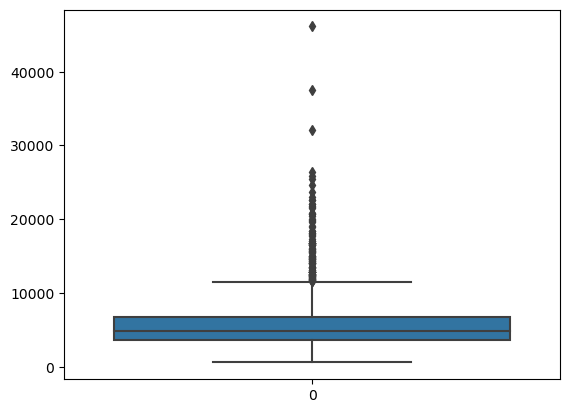

In [19]:
sns.boxplot(df.groupby('CLASS_TITLE')['MONTHLY'].median())
plt.show()

In [20]:
df.pivot_table(values = ['MONTHLY'], index = ['CLASS_TITLE','STATUS'], aggfunc = 'median')

,,MONTHLY
CLASS_TITLE,STATUS,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,3334.000
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,5416.080
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,5011.360
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,5534.560
21 SYSTEMS ADMINISTRATOR III,URF - UNCLASSIFIED REGULAR FULL-TIME,4864.585
...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,3270.830
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,3583.330
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,3966.930


In [26]:
df['MONTHLY'].max()

46125.0

# Change in compensation over time

In [21]:
df["year_of_employment"] = pd.DatetimeIndex(df['EMPLOY_DATE']).year
df['years_of_service'] = 2020- df['year_of_employment']  #as the data was last updated on (20.5.2020)
 

In [22]:
df['years_of_service'] = df['years_of_service'].clip(lower=0)

In [23]:
pd.DatetimeIndex(df['EMPLOY_DATE']).year.min()

1975

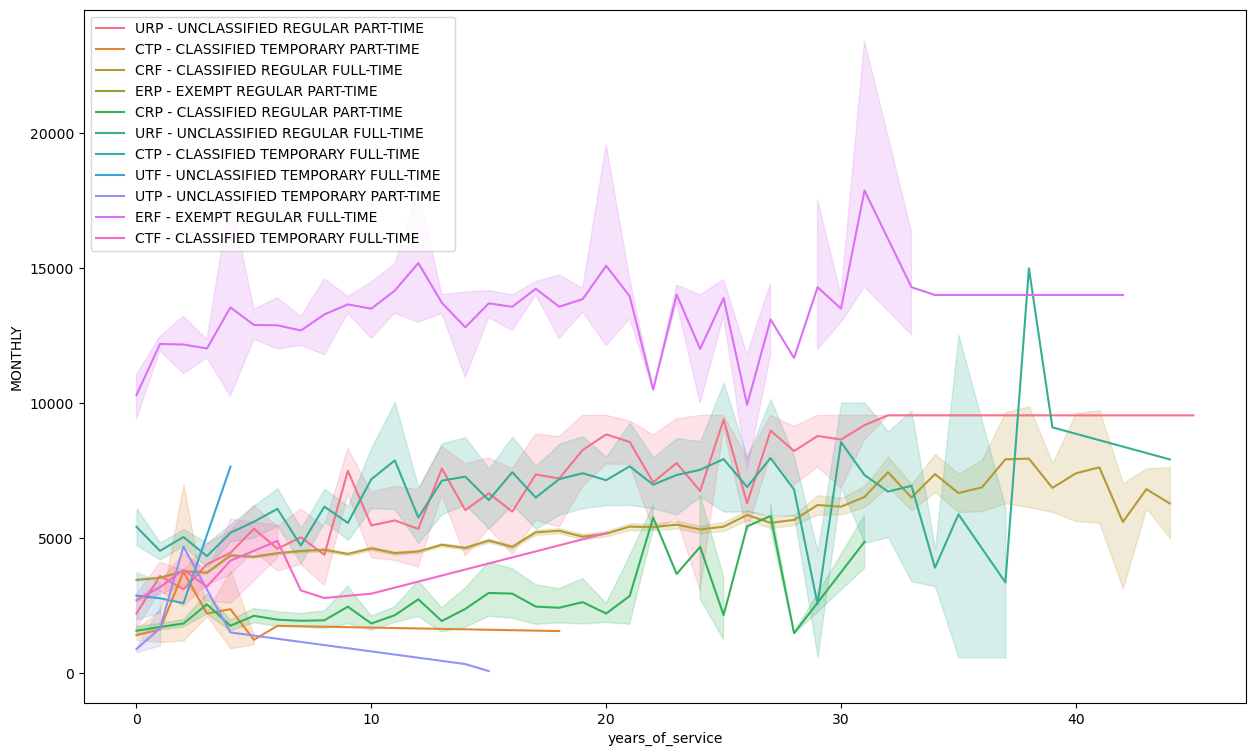

In [24]:
plt.figure(figsize=(15,9))
sns.lineplot(x='years_of_service', y='MONTHLY',hue ='STATUS', data= df)
plt.legend()
plt.show()

In [25]:
df.pivot_table(values = ['MONTHLY', 'years_of_service'], index = ['CLASS_TITLE','STATUS'], aggfunc = 'mean')

,,MONTHLY,years_of_service
CLASS_TITLE,STATUS,,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,3366.931429,1.857143
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,5416.080000,3.500000
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,4953.772857,9.571429
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,5368.566667,16.333333
21 SYSTEMS ADMINISTRATOR III,URF - UNCLASSIFIED REGULAR FULL-TIME,4864.585000,2.500000
...,...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,3270.830000,2.500000
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,3583.330000,6.000000
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,4120.993333,13.333333


### Predicting models for salaries

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
#we use various different models to find the best result

# Label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
        
        
df

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER,year_of_employment,years_of_service
0,241,17,30461,15274,22,1409,711,5,1,8,947,75.96150,29.0,9545.82,127717,1988,32
1,212,48,30461,15274,22,616,560,5,1,4,605,81.04454,4.0,1404.77,127717,2015,5
2,241,17,33197,10053,10,1409,711,5,1,8,610,75.96150,29.0,9545.82,59115,2020,0
3,212,48,33197,10053,10,616,560,5,1,4,4268,81.04453,4.0,1404.77,59115,2018,2
4,696,88,26462,6953,0,810,292,3,0,0,3209,0.00000,40.0,3284.27,165030,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,76,37355,10053,16,1042,1198,5,1,0,5308,0.00000,40.0,2899.00,770781,2017,3
149477,809,76,37780,7024,1,84,1404,5,0,0,3444,0.00000,40.0,5500.00,847431,2015,5
149478,809,76,38068,5571,3,4,324,5,1,1,5062,12.93000,20.0,1120.60,34266,2012,8
149479,809,76,38313,6089,18,278,1007,5,1,0,4677,0.00000,40.0,5744.16,123490,1989,31


# Target and predictor seperation

In [28]:
X= df.drop(['AGENCY','AGENCY_NAME','LAST NAME' ,'FIRST NAME','MI','EMPLOY_DATE','STATE NUMBER','year_of_employment', 'MONTHLY'], axis=1)
y=df['MONTHLY']
print(X)
print(y)

        CLASS_CODE  CLASS_TITLE  ETHNICITY  GENDER  STATUS  HRLY_RATE  \
0             1409          711          5       1       8   75.96150   
1              616          560          5       1       4   81.04454   
2             1409          711          5       1       8   75.96150   
3              616          560          5       1       4   81.04453   
4              810          292          3       0       0    0.00000   
...            ...          ...        ...     ...     ...        ...   
149476        1042         1198          5       1       0    0.00000   
149477          84         1404          5       0       0    0.00000   
149478           4          324          5       1       1   12.93000   
149479         278         1007          5       1       0    0.00000   
149480           4          324          5       0       1   11.74000   

        HRS_PER_WK  years_of_service  
0             29.0                32  
1              4.0                 5  
2     

# Train test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

# Model creation

In [30]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=5)
    print("Train R2 :", model.score(X_train, y_train))
    print("Test R2: ", model.score(X_test, y_test))
    print("Cross Validation Score: ", scores.mean())
    return 'model ran succesfully!'

# Model evaluation

In [31]:
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge()
model4 = XGBRegressor()
models = [model1,model2, model3, model4]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print(fitAndPredict(model))

Model  1 : LinearRegression()
Train R2 : 0.18867557661160206
Test R2:  0.18159067261107253
Cross Validation Score:  -0.0645620545268096
model ran succesfully!
Model  2 : Lasso()
Train R2 : 0.18867430493223214
Test R2:  0.18162660685314502
Cross Validation Score:  -0.06380953786640095
model ran succesfully!
Model  3 : Ridge()
Train R2 : 0.1886755765966659
Test R2:  0.181590803017448
Cross Validation Score:  -0.06455782404852024
model ran succesfully!
Model  4 : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leav

# Model Comparison Report

In [32]:
""" We have used LinearRegression,Lasso,Ridge,XGBRegressor machine learning models for this problem,the best is lasso model,
    we can say this by seeing the test r2 and train r2.we can choose lasso as best model"""

' We have used LinearRegression,Lasso,Ridge,XGBRegressor machine learning models for this problem,the best is lasso model,\n    we can say this by seeing the test r2 and train r2.we can choose lasso as best model'

# Report on Challenges faced

In [33]:
""" We found the challenges in outliers and wage disparities and we found out the solution by watching recorded classes."""
""" The techniques are data preprocessing,used to know the null values and outliers.Model selection technique for knowing 
    the suitable model.Exploratory Data Analysis(EDA) to explore the relationships between different features and 
    the target variable """

' The techniques are data preprocessing,used to know the null values and outliers.Model selection technique for knowing \n    the suitable model.Exploratory Data Analysis(EDA) to explore the relationships between different features and \n    the target variable '